In [ ]:
## Scraper for League Statistics (Totals)

from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

# URL to scrape from
url = "https://www.basketball-reference.com/leagues/NBA_stats_totals.html"
html = urlopen(url)
soup = BeautifulSoup(html, features="lxml")

# Extracting headers for columns
headers = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th') if th.getText() != 'Rk']
stats_columns = ['Rk', 'Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

def scrape_nba_stats(url):
    html = urlopen(url)
    soup = BeautifulSoup(html, features="lxml")
    rows = soup.findAll('tr')[1:]
    rows_data = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]
    df = pd.DataFrame(rows_data, columns=headers)

    return df

# Calling function to scrape data
nba_stats_df = scrape_nba_stats(url)

# Exporting data to a CSV file
nba_stats_df.to_csv("nba_stats_data_totals.csv", index=False)



In [ ]:
## Scraper for League Statistics (Per Game)

from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

# URL to scrape from
url = "https://www.basketball-reference.com/leagues/NBA_stats_per_game.html"
html = urlopen(url)
soup = BeautifulSoup(html, features="lxml")

# Extracting headers as columns
headers = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th') if th.getText() != 'Rk']
stats_columns = ['Rk', 'Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

def scrape_nba_stats(url):
    html = urlopen(url)

    soup = BeautifulSoup(html, features="lxml")

    # Get rows from table
    rows = soup.findAll('tr')[1:]
    rows_data = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

    # Placing data in a DataFrame
    df = pd.DataFrame(rows_data, columns=headers)

    return df

# Calling function to scrape data
nba_stats_df = scrape_nba_stats(url)

# Exporting data to a CSV file
nba_stats_df.to_csv("nba_stats_data_per_game.csv", index=False)


In [ ]:
# Setting up plotting packages and reading in data files

import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

save_dir = r'C:\Users\vk200\OneDrive\Desktop\ORFE Senior Thesis\NBA Trend Graphs'

# Load your CSV file (update the file path accordingly)
excel_file_path = '/content/nba_season_stats_totals_and_per_game.csv'

# Load the CSV file with explicitly specified data types
column_data_types = {
    'Season': str,
    'FG': float,
    '3P': float,
    '3P/FG': float,  # Add other columns and their data types as needed
    'FGA': float,
    '3PA': float,
    '3PA/FGA': float,
    '3P%': float,
    'eFG%': float,
    'ORB%': float,
    'ORtg': float,
}

df = pd.read_csv(excel_file_path, dtype=column_data_types)

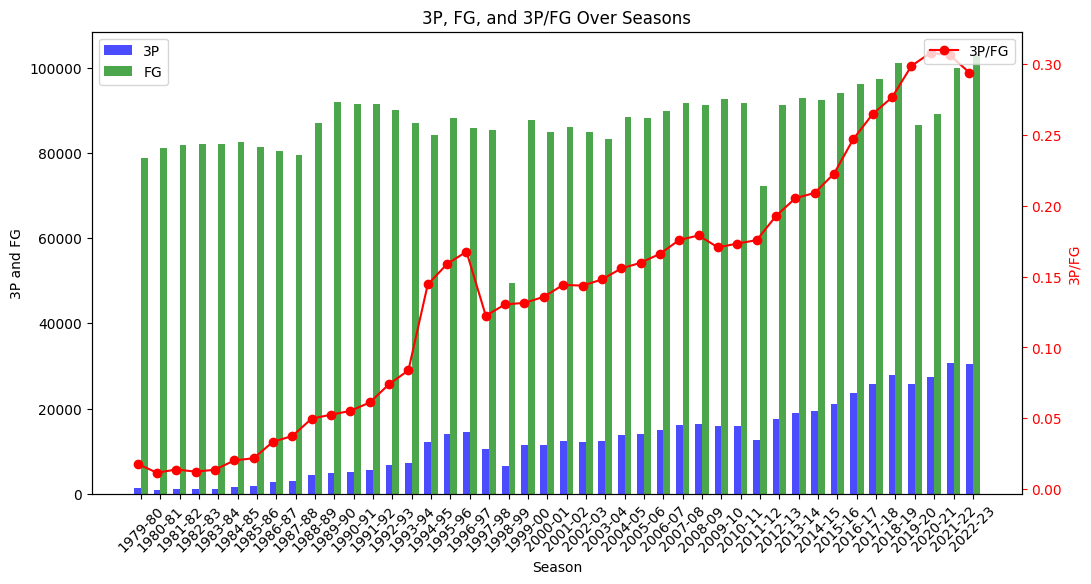

In [ ]:
# Create a bar graph for '3P' and 'FG'
fig, ax1 = plt.subplots(figsize=(12, 6))

bar_width = 0.35
bar_positions = range(len(df.index))

ax1.bar(bar_positions, df['3P'], width=bar_width, label='3P', color='blue', alpha=0.7)
ax1.bar([pos + bar_width for pos in bar_positions], df['FG'], width=bar_width, label='FG', color='green', alpha=0.7)

ax1.set_xlabel('Season')
ax1.set_ylabel('3P and FG')
ax1.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax1.set_xticklabels(df['Season'], rotation=45)  # Use 'Season' column for xtick labels
ax1.legend()

# Create a line plot for '3P/FG'
ax2 = ax1.twinx()
ax2.plot(df.index, df['3P/FG'], color='red', marker='o', label='3P/FG')

ax2.set_ylabel('3P/FG', color='red')
ax2.tick_params('y', colors='red')
ax2.legend(loc='upper right')

plt.title('3P, FG, and 3P/FG Over Seasons')
plt.show()


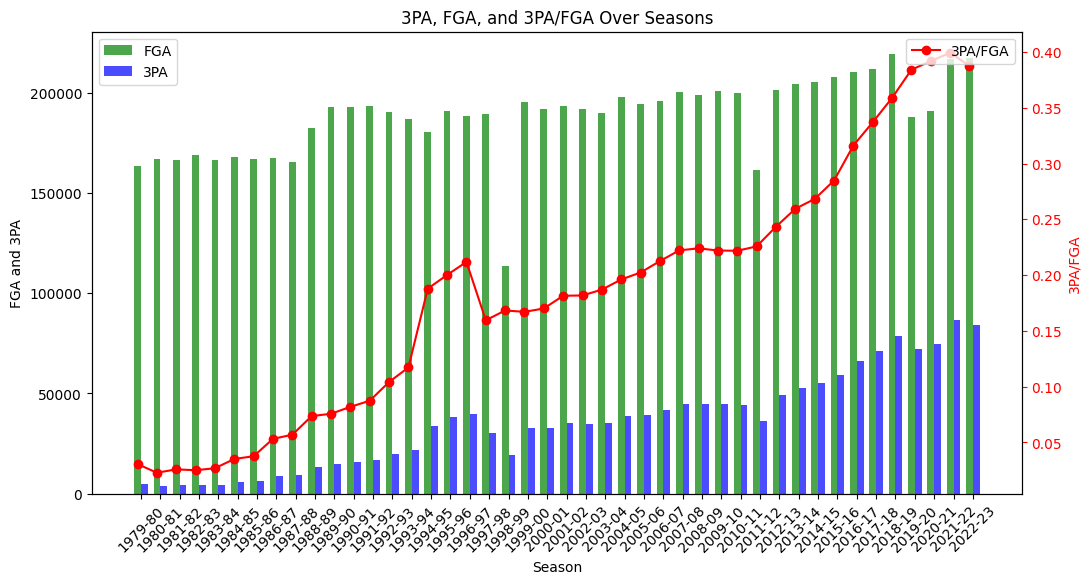

In [ ]:
# Graph 2: FGA, 3PA, and 3PA/FGA
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(bar_positions, df['FGA'], width=bar_width, label='FGA', color='green', alpha=0.7)
ax1.bar([pos + bar_width for pos in bar_positions], df['3PA'], width=bar_width, label='3PA', color='blue', alpha=0.7)

ax1.set_xlabel('Season')
ax1.set_ylabel('FGA and 3PA')
ax1.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax1.set_xticklabels(df['Season'], rotation=45)  # Use 'Season' column for xtick labels
ax1.legend()

# Create a line plot for '3PA/FGA'
ax2 = ax1.twinx()
ax2.plot(df.index, df['3PA/FGA'], color='red', marker='o', label='3PA/FGA')

ax2.set_ylabel('3PA/FGA', color='red')
ax2.tick_params('y', colors='red')
ax2.legend(loc='upper right')

plt.title('3PA, FGA, and 3PA/FGA Over Seasons')
plt.show()

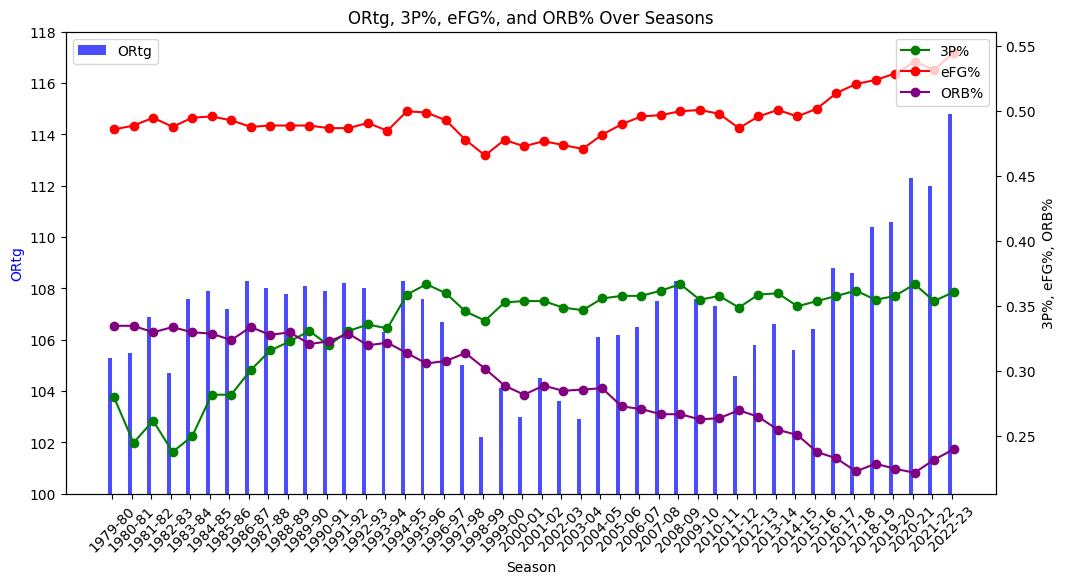

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar graph for ORtg
bar_width = 0.2
bar_positions = range(len(df.index))
ax1.bar([pos - bar_width for pos in bar_positions], df['ORtg'], width=bar_width, label='ORtg', color='blue', alpha=0.7)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Line plots for 3P%, eFG%, and ORB%
ax2.plot(df.index, df['3P%'], label='3P%', color='green', marker='o')
ax2.plot(df.index, df['eFG%'], label='eFG%', color='red', marker='o')
ax2.plot(df.index, df['ORB%'], label='ORB%', color='purple', marker='o')

ax1.set_xlabel('Season')
ax1.set_ylabel('ORtg', color='blue')
ax2.set_ylabel('3P%, eFG%, ORB%', color='black')

ax1.set_xticks([pos - bar_width / 2 for pos in bar_positions])
ax1.set_xticklabels(df['Season'], rotation=45)

# Adjust y-axis limits for ORtg
ax1.set_ylim(100, 118)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('ORtg, 3P%, eFG%, and ORB% Over Seasons')
plt.show()